# Learn Generative Adversarial Network

## 1. Import Dependencies and Data

In [1]:
# Importing the libraries
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2023-12-03 19:26:36.231096: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 19:26:37.253677: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 19:26:37.253754: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
# Get the data fashion mnist
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

/home/gabe/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ds = tfds.load('fashion_mnist', split='train')

2023-12-03 19:26:38.061729: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 19:26:38.063389: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 19:26:38.063507: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-03 19:26:38.063544: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so 

In [4]:
ds.as_numpy_iterator().next()['label']

2023-12-03 19:26:38.847990: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:38.855570: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:38.862833: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:38.896061: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


2

## 2. Visualization data dan create dataset

In [5]:
# Do some data transformation
import numpy as np

In [6]:
dataiterator =ds.as_numpy_iterator()

2023-12-03 19:26:38.932122: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:38.936523: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [7]:
# Getting data out of the pipeline
dataiterator.next()['image']

2023-12-03 19:26:38.946346: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

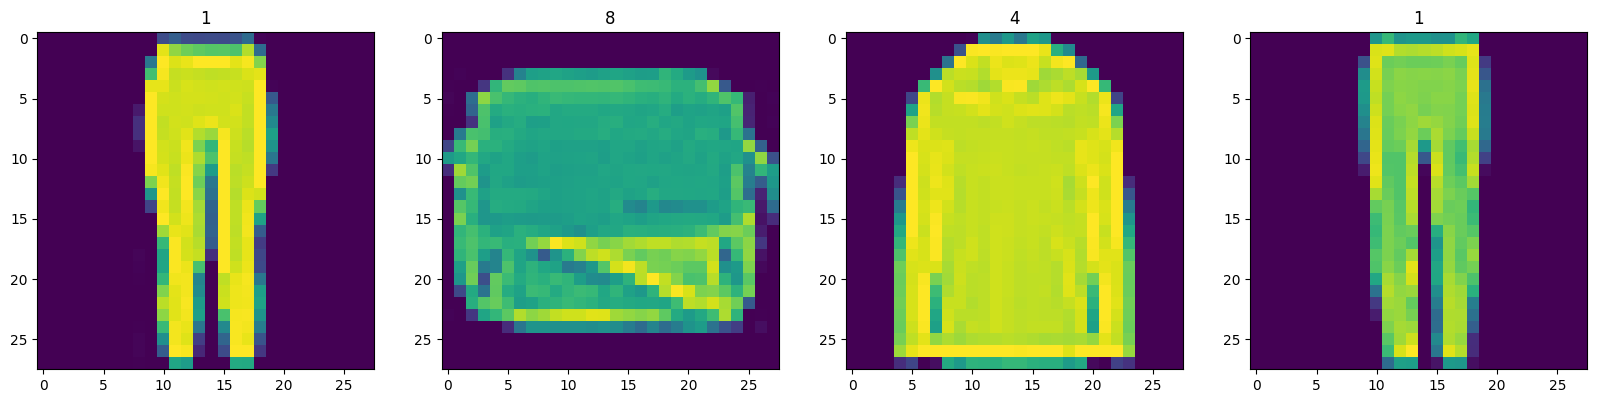

In [8]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx in range(4):
    # Get the image and label
    img = dataiterator.next()
    ax[idx].imshow(img['image'])
    ax[idx].title.set_text(img['label'])
    

In [9]:
# Scale and return images only 
def scale_image(data):
    image = data['image']
    return image/255

In [10]:
# Reload the dataset 
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_image)
# Cache the dataset for that batch 
ds = ds.cache()
# Shuffle it up 
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking 
ds = ds.prefetch(64)

In [11]:
ds.as_numpy_iterator().next().shape

2023-12-03 19:26:39.810371: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:39.816769: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:39.820130: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:39.826738: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


(128, 28, 28, 1)

## 3. Build Neural Network

### 3.1 Import Modeling Component

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### 3.2 Build Generator

In [13]:
def BuildGenerator():
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginning of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=5, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=5, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # Convolutional Block 1
    model.add(Conv2D(128, kernel_size=4, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # Convolutional Block 2
    model.add(Conv2D(128, kernel_size=4, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # Conv layer to one channel
    model.add(Conv2D(1, kernel_size=4, padding='same', activation='sigmoid'))
    
    return model

In [14]:
generator = BuildGenerator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

2023-12-03 19:26:41.687327: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:41.692090: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:41.696612: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:41.783302: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


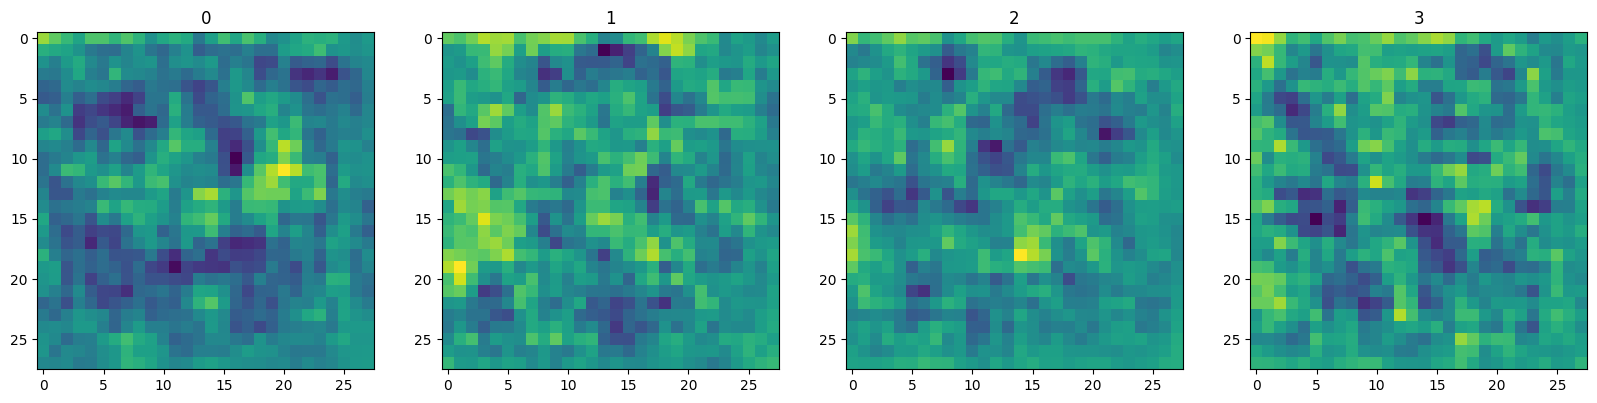

In [15]:
img = generator.predict(np.random.randn(4,128,1))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

### 3.3 Build Discriminator

In [16]:
def BuildDiscriminator():
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape=(28,28,1)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    # Forth Conv Block
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [17]:
discriminator = BuildDiscriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [18]:
img = generator.predict(np.random.randn(4,128,1))
img.shape

2023-12-03 19:26:42.853084: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:42.856895: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:42.859753: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


(4, 28, 28, 1)

In [19]:
discriminator.predict(img)

2023-12-03 19:26:42.901196: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:42.905614: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:42.908761: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-12-03 19:26:42.955001: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


array([[0.5080939 ],
       [0.50829405],
       [0.50825876],
       [0.508731  ]], dtype=float32)

### 4. Construct Training Loop


#### 4.1 Setup Losses and Optimizers

In [20]:
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

In [21]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

#### 4.2 Build Subclassed Model

In [22]:
from tensorflow.keras.models import Model

In [23]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super(FashionGAN, self).__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super(FashionGAN, self).compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
        
    def train_step(self, batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # add some noise to the True output
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSSENTROPY
            total_d_loss= self.d_loss(y_realfake, yhat_realfake)
        
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some fake images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
            
            # Create the predicted labels for the fake images
            predicted_labels = self.discriminator(gen_images, training=False)
            
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
        
        # Apply backpropagation
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {'d_loss': total_d_loss, 'g_loss': total_g_loss}

In [24]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [25]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### 4.3 Build Callback

In [26]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [27]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim
        
    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/home/gabe/Documents/TF_Learn_DL/generated_img', f'generated_img_{epoch}_{i}.png'))

### 4.4 Train

In [28]:
# Recommend 2000 epochs
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20


2023-12-03 19:26:44.569328: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


  6/469 [..............................] - ETA: 7:01 - d_loss: 0.6938 - g_loss: 0.7030WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2309s vs `on_train_batch_end` time: 0.5664s). Check your callbacks.


165/469 [=========>....................] - ETA: 4:37 - d_loss: 0.7131 - g_loss: 0.7289

KeyboardInterrupt: 

## 4.5 Review Performance

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

## 5. Test Out the Generator

### 5.1 Generate Images

In [1]:
generator.load_weights('/home/gabe/Documents/TF_Learn_DL/model/generatormodel.h5')

NameError: name 'generator' is not defined